<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/10%EC%A3%BC%EC%B0%A8/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)

    loaded = np.dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/UCI HAR Dataset/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

#스케일링
from sklearn.preprocessing import StandardScaler

# 원래 shape 저장
n_samples, n_timesteps, n_features = trainX.shape

# (7352*128, 9) 형태로 변환 — 모든 시점의 feature를 하나로 봄
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX.reshape(-1, n_features)).reshape(n_samples, n_timesteps, n_features)
testX = scaler.transform(testX.reshape(-1, n_features)).reshape(testX.shape)

from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-3958942637.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3958942637.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3958942637.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3958942637.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(128, 9)))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, 3, activation='relu'))
model.add(layers.Conv1D(256, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
#모델 컴파일하기
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model_cnn = model.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=128, verbose=2)

Epoch 1/50
42/42 - 17s - 397ms/step - accuracy: 0.5495 - loss: 0.9718 - val_accuracy: 0.6825 - val_loss: 0.4903
Epoch 2/50
42/42 - 0s - 10ms/step - accuracy: 0.8738 - loss: 0.3199 - val_accuracy: 0.9440 - val_loss: 0.1596
Epoch 3/50
42/42 - 0s - 10ms/step - accuracy: 0.9305 - loss: 0.1662 - val_accuracy: 0.9440 - val_loss: 0.1284
Epoch 4/50
42/42 - 0s - 9ms/step - accuracy: 0.9475 - loss: 0.1300 - val_accuracy: 0.9474 - val_loss: 0.1280
Epoch 5/50
42/42 - 0s - 10ms/step - accuracy: 0.9539 - loss: 0.1169 - val_accuracy: 0.9576 - val_loss: 0.1083
Epoch 6/50
42/42 - 1s - 14ms/step - accuracy: 0.9588 - loss: 0.0985 - val_accuracy: 0.9525 - val_loss: 0.0979
Epoch 7/50
42/42 - 0s - 11ms/step - accuracy: 0.9594 - loss: 0.0917 - val_accuracy: 0.9508 - val_loss: 0.0991
Epoch 8/50
42/42 - 0s - 12ms/step - accuracy: 0.9586 - loss: 0.0947 - val_accuracy: 0.9491 - val_loss: 0.1011
Epoch 9/50
42/42 - 0s - 8ms/step - accuracy: 0.9573 - loss: 0.0961 - val_accuracy: 0.9474 - val_loss: 0.1206
Epoch 10/5

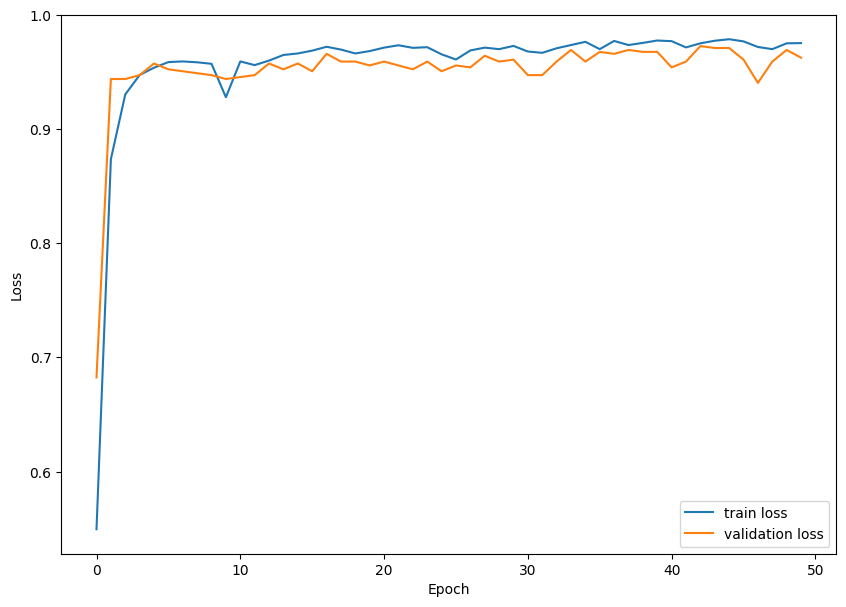

In [6]:
# loss 체크
import matplotlib.pyplot as plt

N_EPOCHS = 50 # 에포크 수 정의
history = model_cnn # 학습 히스토리 변수 사용

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['accuracy'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_accuracy'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

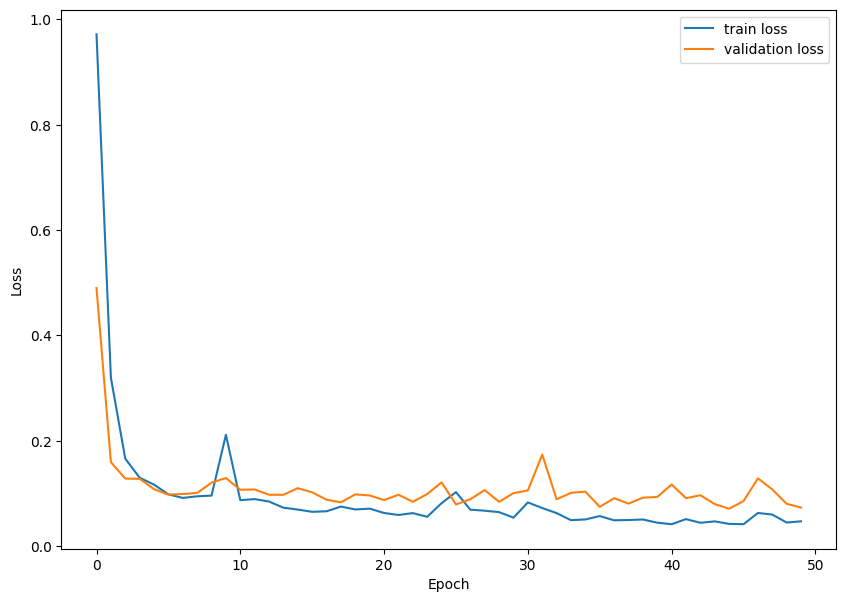

In [7]:
# loss 체크
import matplotlib.pyplot as plt

N_EPOCHS = 50 # 에포크 수 정의
history = model_cnn # 학습 히스토리 변수 사용

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(testX, testy)
print(f"Test accuracy: {test_acc:.2%}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8714 - loss: 0.9381
Test accuracy: 90.84%


In [9]:
print(np.mean(trainX, axis=(0,1)), np.std(trainX, axis=(0,1)))

[-6.04841559e-14  2.44348260e-15  5.42542353e-15  3.44693707e-17
  2.92595375e-17  5.41681091e-17  1.45763019e-16  5.82972795e-17
 -5.83237062e-17] [1. 1. 1. 1. 1. 1. 1. 1. 1.]
